![alt text](images/visit-scotland-logo.jpg "Logo")

# Analysis

## Business Questions

- 1. What kind of tourism activity generates the highest income for Scotland?

- 2. Which kind of activity generates the most visits to sites?

- 3. Is there a particular key demographic of visitors we should be focusing on? 
    - Who spends the most?
    - Who visits the most?
 
- 4. What type of locations receive the most visits? 
    - What kinds of locations do people spend the most in?

- 5. Is there a particular method of travel our visitors arrive by? 
    - Some of our locations are remote and not easily accessible by public transport, so this would be good information to have.

- 6. When looking at regional tourism, what insights can we gain? 
    - Where are our visitors from? 
    - How do they differ in the money they spend, nights they spend in Scotland, or number of visits they do?
 
- 7. What type of accomodation is most popular? 
    - Is there a difference by location?

- 8. How have general tourism rates changed over time?

- 9. Is there any way to predict spending and visits for Visit Scotland?


## Load Cleaned Data & Libraries

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clean data
accomodation_occupancy = pd.read_csv('data/clean_data/accomodation_occupancy.csv')
activities = pd.read_csv('data/clean_data/activities.csv')
demographics = pd.read_csv('data/clean_data/demographics.csv')
international_survey = pd.read_csv('data/clean_data/international_survey.csv')
location = pd.read_csv('data/clean_data/location.csv')
regional_tourism = pd.read_csv('data/clean_data/regional_tourism.csv')
transport = pd.read_csv('data/clean_data/transport.csv')

#set plot sizes
sns.set_context('poster', font_scale=0.4)
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10

## Analysis (business questions)
### Question 1: What kind of tourism activity generates the highest income for Scotland?

In [2]:
# activity data grouped by type

activity_q1 = (
    activities.query("activity_type not in ['All'] & breakdown_of_domestic_tourism == 'Expenditure'")
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name = 'total_expenditure')
    .copy()
)

In [3]:
activity_q1

,activity_type,total_expenditure
0,Pubs & Restaurants,20549
1,Leisure activity,11587
2,Shopping,10222
3,Visiting family/friends,10142
4,Other,7084
5,Live events,5481
6,Entertainment,4240
7,Tourist attraction,3251
8,Excursions,2721


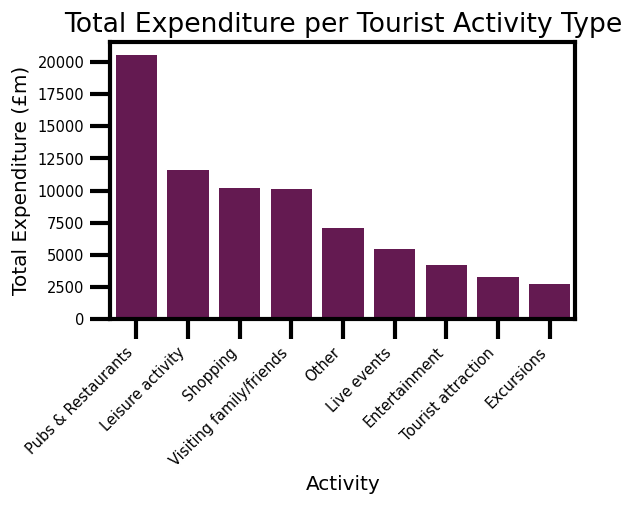

In [4]:
sns.barplot(data = activity_q1, x='activity_type', y='total_expenditure', color='#700e57')
plt.xlabel("Activity", fontsize = 12)
plt.ylabel("Total Expenditure (£m)" , fontsize = 12)
plt.title('Total Expenditure per Tourist Activity Type' , fontsize = 16)
plt.xticks(rotation = 45, ha='right');

As the graph displays above the acitivity type what generates the most income for tourist activities Pubs & Restaurants, the income has generated is over £2000 million from 2013-2019.

In [5]:
#data for lineplot
activity_q1_1 = (
    activities.query("activity_type != 'All' & breakdown_of_domestic_tourism == 'Expenditure'")
    .groupby(['year','activity_type'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name = 'total_expenditure_per_year')
    .copy()
)

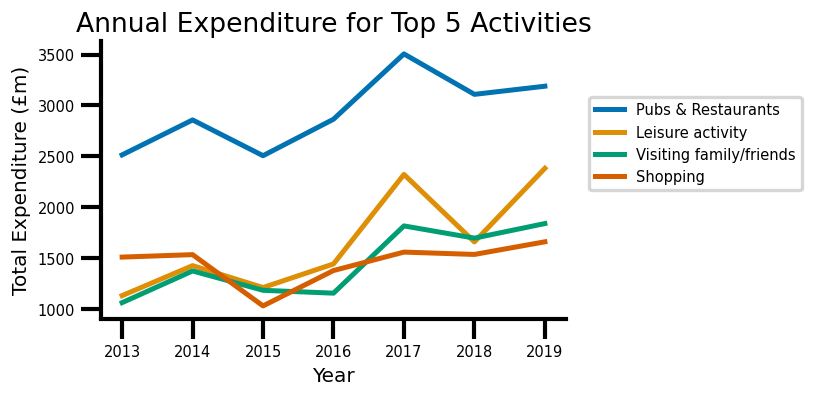

In [6]:
sns.lineplot(
    data=activity_q1_1.query("activity_type.isin(['Pubs & Restaurants', 'Leisure activity','Shopping', 'Visiting family/friends','Live event'])"), 
    x='year', y='total_expenditure_per_year', hue='activity_type', palette='colorblind')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Total Expenditure (£m)" , fontsize = 12)
plt.title('Annual Expenditure for Top 5 Activities' , fontsize = 16);

As you can see in this graph Drinking & Eating brings in significantly higher income than the other activity types, however it appears that leisure activities, visiting family/friends and shopping are relativly stably increasing year by year.

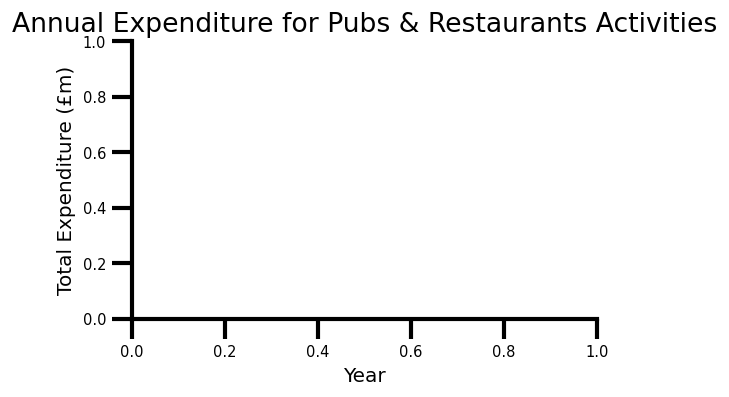

In [7]:
sns.lineplot(
    data=activity_q1_1.query("activity_type == 'Drinking & Eating'"), 
    x='year', y='total_expenditure_per_year', color='#0173b2')
sns.despine()
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Total Expenditure (£m)" , fontsize = 12)
plt.title('Annual Expenditure for Pubs & Restaurants Activities' , fontsize = 16);

As you can see in the graph above there has been an increase in income generated by `Drinking & Eating` , which seems to have significantly increase from `2015-2017` then somewhat dropping slighly in 2018 to slowly improving from then onwards to 2019.

### Question 2: Which kind of activity generates the most visits to sites?

In [8]:
#data for plots

# barplot: group by activity type
activity_q2_1 = (
    activities.query("activity_type != 'All' & breakdown_of_domestic_tourism == 'Visits'")
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name = 'total_visits')
    .copy()
)

# lineplot: group by activity type & year
activity_q2_2 = (
    activities.query("activity_type != 'All' & breakdown_of_domestic_tourism == 'Visits'")
    .groupby(['year','activity_type'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name = 'total_visits_per_year')
    .copy()
)

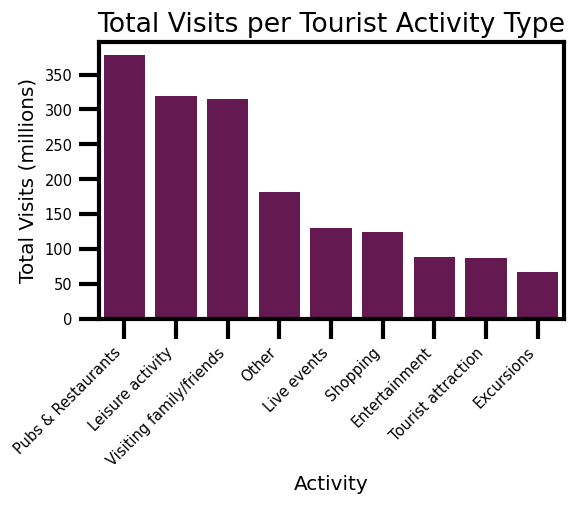

In [9]:
#barplot
sns.barplot(data = activity_q2_1, x='activity_type', y='total_visits', color='#700e57')
plt.xlabel("Activity", fontsize = 12)
plt.ylabel("Total Visits (millions)" , fontsize = 12)
plt.title('Total Visits per Tourist Activity Type' , fontsize = 16)
plt.xticks(rotation = 45, ha='right');

Although Drinking & eating has the most visits, this is two activity types which have been put together. Roughly drinking and eating generated the most visits with over 350 million visits from 2013-2019. `Leisure activities` and `Visiting family/friends`  are very similar to one another. Due to `Leisure activities` being a group of seperate activities and `Pubs & Restaurants` being combined, arguably the most visits generated are from `Visiting family/friends`.

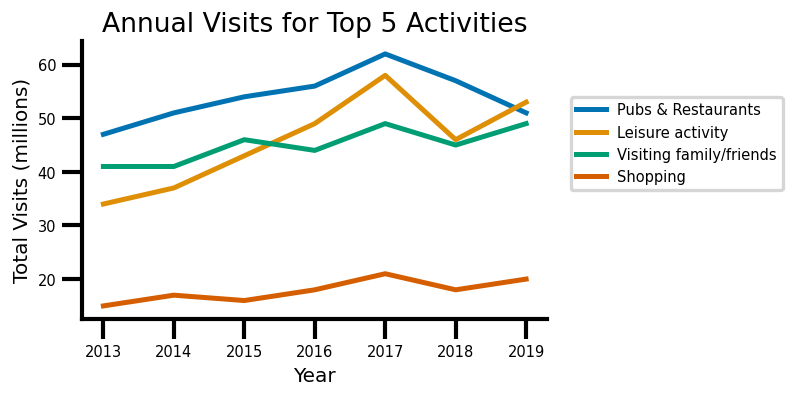

In [10]:
#lineplot
sns.lineplot(
    data=activity_q2_2.query("activity_type.isin(['Pubs & Restaurants', 'Leisure activity','Shopping', 'Visiting family/friends','Live event'])"), 
    x='year', y='total_visits_per_year', hue='activity_type', palette='colorblind')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Total Visits (millions)" , fontsize = 12)
plt.title('Annual Visits for Top 5 Activities' , fontsize = 16);

As you can see in the graph above the activities that generate the most income also generate the most amount of visits. However it appears that `Leisure activities` and `Visiting family/friends` are potentially going to surpass `Drinking & Eating` for generating the most visits.

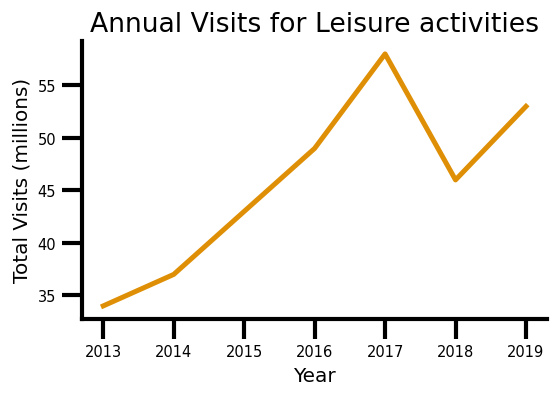

In [11]:
sns.lineplot(
    data=activity_q2_2.query("activity_type == 'Leisure activity'"), 
    x='year', y='total_visits_per_year', color='#de8f05')
sns.despine()
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Total Visits (millions)" , fontsize = 12)
plt.title('Annual Visits for Leisure activities' , fontsize = 16);

It appears that the visits generated by `Leisure activities` has significantly increased over time.

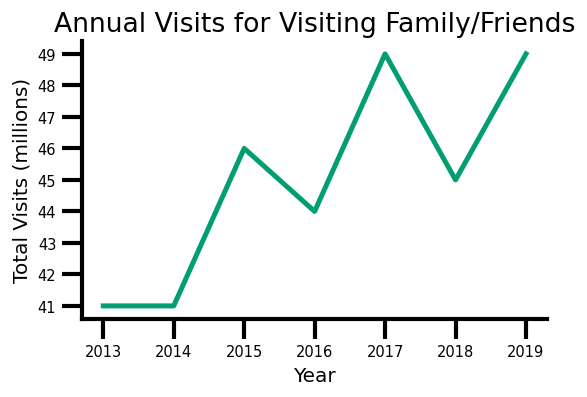

In [12]:
sns.lineplot(
    data=activity_q2_2.query("activity_type == 'Visiting family/friends'"), 
    x='year', y='total_visits_per_year', color='#029e73')
sns.despine()
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Total Visits (millions)" , fontsize = 12)
plt.title('Annual Visits for Visiting Family/Friends' , fontsize = 16);

It appears that the visits generated by `Visiting family/friends` has steadily increased over time.

### Question3: Is there a particular key demographic of visitors we should be focusing on? 
 - #### 3.1 Who spends the most?
 - #### 3.2 Who visits the most?

The demographics data set is aggegated in a way that it's particular hard to fully analyse, due to it being a summary of all of the different demographics types.

'All' needs to be filtered from mutiple columns...

In [13]:
#filter 'All' from multiple columns
demographics

,year,units,value,breakdown_of_domestic_tourism,age,marital_status,gender,employment_status,children,access_to_car,social_grade
0,2013,Million Visits,22,Visits,45-54 years,All,All,All,All,All,All
1,2013,Million Visits,58,Visits,All,All,Male,All,All,All,All
2,2016,Million Visits,23,Visits,25-34 years,All,All,All,All,All,All
3,2019,Million Visits,56,Visits,All,Not Married,All,All,All,All,All
4,2015,Million Visits,52,Visits,All,Not Married,All,All,All,All,All
...,...,...,...,...,...,...,...,...,...,...,...
303,2019,million pounds (GBP),715,Expenditure,All,All,All,Unemployed/not working,All,All,All
304,2018,Million Visits,15,Visits,All,All,All,Unemployed/not working,All,All,All
305,2015,Million Visits,15,Visits,All,All,All,Unemployed/not working,All,All,All
306,2013,Million Visits,46,Visits,All,All,All,Unemployed/not working,All,All,All


In [14]:
demographics.query("age != 'All' & marital_status != 'All' & gender != 'All' & employment_status != 'All' & children != 'All' & access_to_car != 'All' & social_grade != 'All'")

,year,units,value,breakdown_of_domestic_tourism,age,marital_status,gender,employment_status,children,access_to_car,social_grade


Unfortunately filtering `All` from each columns doesn't work so it'll be best to test specific demographics..

In [15]:
demographics.query("social_grade != 'All'").head(10)

,year,units,value,breakdown_of_domestic_tourism,age,marital_status,gender,employment_status,children,access_to_car,social_grade
23,2014,Million Visits,47,Visits,All,All,All,All,All,All,AB
24,2016,Million Visits,42,Visits,All,All,All,All,All,All,C1
26,2018,Million Visits,45,Visits,All,All,All,All,All,All,AB
36,2019,million pounds (GBP),1228,Expenditure,All,All,All,All,All,All,C2
37,2016,million pounds (GBP),729,Expenditure,All,All,All,All,All,All,DE
38,2015,million pounds (GBP),1484,Expenditure,All,All,All,All,All,All,AB
40,2017,million pounds (GBP),2033,Expenditure,All,All,All,All,All,All,AB
41,2017,million pounds (GBP),816,Expenditure,All,All,All,All,All,All,DE
43,2013,million pounds (GBP),522,Expenditure,All,All,All,All,All,All,DE
44,2017,million pounds (GBP),1645,Expenditure,All,All,All,All,All,All,C1


In [16]:
# filter all columns which 'all' is in all columns...
demographics_filtered = demographics.query("age != 'All' | marital_status != 'All' | gender != 'All' | employment_status != 'All' | children != 'All' | access_to_car != 'All' | social_grade != 'All'").copy()
demographics_filtered

,year,units,value,breakdown_of_domestic_tourism,age,marital_status,gender,employment_status,children,access_to_car,social_grade
0,2013,Million Visits,22,Visits,45-54 years,All,All,All,All,All,All
1,2013,Million Visits,58,Visits,All,All,Male,All,All,All,All
2,2016,Million Visits,23,Visits,25-34 years,All,All,All,All,All,All
3,2019,Million Visits,56,Visits,All,Not Married,All,All,All,All,All
4,2015,Million Visits,52,Visits,All,Not Married,All,All,All,All,All
...,...,...,...,...,...,...,...,...,...,...,...
303,2019,million pounds (GBP),715,Expenditure,All,All,All,Unemployed/not working,All,All,All
304,2018,Million Visits,15,Visits,All,All,All,Unemployed/not working,All,All,All
305,2015,Million Visits,15,Visits,All,All,All,Unemployed/not working,All,All,All
306,2013,Million Visits,46,Visits,All,All,All,Unemployed/not working,All,All,All


To fix this summary problem this specific dataset has, it is probably best to record a new column call `demopgraphic` to record when `All` doesnt appear in any of the columns from `breakdown_of_domestic_tourism`:`social_grade`

In [17]:
# Melting dataframes!!!
melted_demo = demographics_filtered.copy()

melted_demo = melted_demo.melt(['year','units','value','breakdown_of_domestic_tourism'], var_name='category', value_name='demographic').query("demographic != 'All'").reset_index()
melted_demo.drop(['index'], axis=1, inplace=True)
melted_demo

,year,units,value,breakdown_of_domestic_tourism,category,demographic
0,2013,Million Visits,22,Visits,age,45-54 years
1,2016,Million Visits,23,Visits,age,25-34 years
2,2015,Million Visits,15,Visits,age,45-54 years
3,2018,Million Visits,23,Visits,age,65 years and over
4,2017,Million Visits,34,Visits,age,16-24 years
...,...,...,...,...,...,...
289,2013,million pounds (GBP),1449,Expenditure,social_grade,C1
290,2016,million pounds (GBP),915,Expenditure,social_grade,C2
291,2014,million pounds (GBP),1892,Expenditure,social_grade,C1
292,2018,million pounds (GBP),1378,Expenditure,social_grade,C1


In [18]:
# Queried data for graphs
#  Expenditure
#  overall demographics (no category)
activity_q3_1 = (
    melted_demo.query("breakdown_of_domestic_tourism == 'Expenditure'")
    .groupby('demographic')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name = 'total_expenditure')
    .copy()
)

#  Demographics by category

# Visits

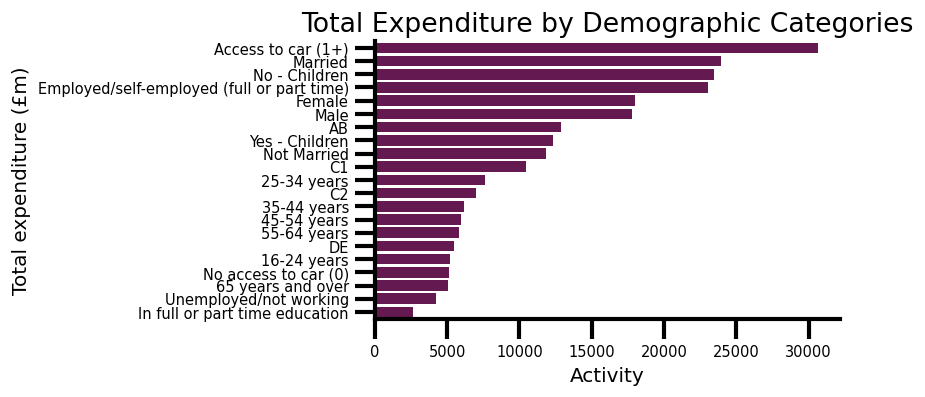

In [19]:
#barplot
sns.barplot(data = activity_q3_1, x='total_expenditure', y='demographic', color='#700e57')
sns.despine()
plt.xlabel("Activity", fontsize = 12)
plt.ylabel("Total expenditure (£m)" , fontsize = 12)
plt.title('Total Expenditure by Demographic Categories' , fontsize = 16);